# Métodos de Monte Carlo

## Estimación de $\pi$

- El valor de $\pi$ puede calcularse por medio de un muestreo de valores de una distribución uniforme de números aleatorios. 
- Como un juego de niños en una playa, el truco es lanzar piedras aleatoriamente a un área cuadrada y verificar cuáles caen dentro de un círculo. La razón entre la cantidad de piedras lanzadas y las que caen dentro del círculo se usa para estimar el valor de $\pi$.

In [6]:
import numpy as np
from numba import njit
import time
import matplotlib.pyplot as plt

1. Se definen dos variables _nTiros_ y _nAciertos = 0_. Estas variables almacenarán la cantidad de muestras que se tomarán de la distribución uniforme y la cantidad de aciertos. Se crea una función que tenga _nTiros_ como parámetro de entrada.
2. Se genera un ciclo que itere desde 0 hasta _nTiros_. 
3. Para cada iteración se obtienen dos valores aleatorios (las coordenadas _x_ y _y_ de la piedra lanzada aleatoriamente según la analogía) de una distribución uniforme entre 0 y 1.
4. Se evalúa si la posición aleatoria cae dentro de un cuarto de círculo con radio 1. Si el lanzamiento cae dentro del cuarto de círculo se suma uno a _nAciertos_, si no, se continua con las iteraciones.
5. Una vez finalizado el ciclo se calcula la razón  entre _nAciertos_ y _nTiros_.
6. Se estima $\pi$ como cuatro veces la razón entre _nAciertos_ y _nTiros_. Note que para un cuadrado de lado 2r su área es $4r^2$, si se toma un cuarto del cuadrado: $A_{cuadrado} = r^2$. El área de un círculo inscrito dentro del cuadrado es: $\pi r^2$, si se toma un cuarto del circulo: $A_{círculo} = \dfrac{\pi}{4}r^2$
            
$$
\Rightarrow \dfrac{A_{cículo}}{A_{cuadrado}} = \dfrac{n_{Aciertos}}{n_{Tiros}}= \dfrac{\pi}{4}
$$

<center> <img src="https://i.ibb.co/2qx2pSZ/diagrama-monte-carlo.png" alt="diagrama de áreas" width="500"/> </center>


In [7]:
nTiros = 100000
nAciertos = 0
r = 1

# Corrida normal
def estimar_pi(nTiros,nAciertos):
    for i in range(nTiros):
        x = np.random.uniform(0,r)
        y = np.random.uniform(0,r)
        d = np.sqrt(x**2+y**2)
        if d<r:
            nAciertos = nAciertos + 1
    pi = 4*nAciertos/nTiros
    
    return pi

pi = print(f"El valor de pi estimado es {estimar_pi(nTiros,nAciertos)}")
normal_time = %timeit -o estimar_pi(nTiros,nAciertos)

El valor de pi estimado es 3.13688
535 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Implementación de numba

Como se ha visto, `numba` es una librería muy útil para la paralelización, y dependiendo de los procesos, es muy fácil implementarla. En este caso, se usará el decorador `@njit` para optimizar el proceso de simulación, dado que se basa en un loop en el que se avalúa si cada intento es un acierto, y no depende de si el tiro anterior lo fue, por lo que puede repartirse entre los hilos del procesador. A continuación se muestra el código con la implementación y su tiempo de corrida respectivo.

In [8]:
@njit
def estimar_pi(nTiros,nAciertos):
    for i in range(nTiros):
        x = np.random.uniform(0,r)
        y = np.random.uniform(0,r)
        d = np.sqrt(x**2+y**2)
        if d<r:
            nAciertos = nAciertos + 1
    pi = 4*nAciertos/nTiros
    
    return pi

pi = print(f"El valor de pi estimado es {estimar_pi(nTiros,nAciertos)}")
numba_time = %timeit -o estimar_pi(nTiros,nAciertos)

El valor de pi estimado es 3.13996
1.16 ms ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Disminución radical del tiempo de corrida:

Véase que con esta sencilla implementación, en una corrida específica de ejemplo, se mejoró la eficiencia en más de `400%` (743 ms contra 1.6 ms)

### Cuantización del error

Se puede medir el error y cómo decrece con el número de tiros. En este caso, se están usando potencias de 2 para el número de tiros, pero puede especificarse cualquier selección de número de tiros.

7. Se usa la función anterior para estimar $\pi$ con _nTiros_ = 4,8, ... , 1024. 
8. Para cada valor de _nTiros_ se estima el valor de $\pi$ _10_ veces. Se toma como resultado final el promedio de los valores obtenidos y se calcula el porcentaje de error entre la estimación de $\pi$ y el valor exacto.

In [9]:
# Se inicia una lista de porcentajes de error, así como la potencia máxima y el número de repeticiones por cada cálculo
porc_error_lista = []
pi_prom_lista = []
potencias = 11
repeticiones = 1000

for i in range(2,potencias):
    pi_lista = []
    for j in range(repeticiones): # Se calcula el pi estimado para cada potencia y se agrega a la lista
        pi_lista.append(estimar_pi(2**i,0))
    pi_prom = np.mean(pi_lista)
    # Se calcula el porcentaje de error contra el teórico (dado por numpy)
    porc_error = np.abs((pi_prom - np.pi)/np.pi)
    porc_error_lista.append(porc_error)

nTiros_lista = []
for i in range(2,potencias):
    nTiros_lista.append(2**i)

nTiros_sqrt_lista = np.sqrt(nTiros_lista)

Brevemente y sin ser este el enfoque del cuaderno actual, se puede visualizar cómo rápidamente disminuye el error, que ya de por sí inicia siendo menor al 0.05%

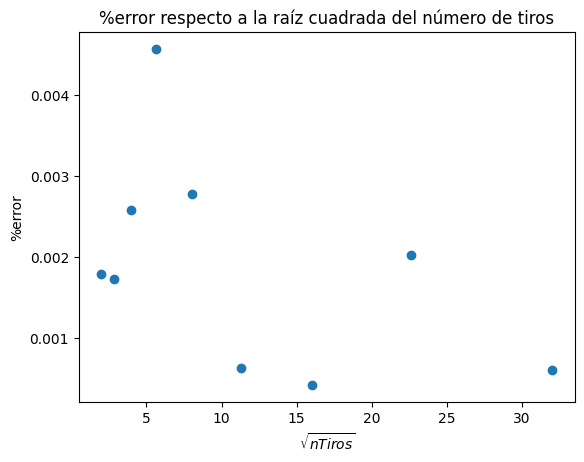

In [10]:
fig, ax = plt.subplots()

# Se grafica la raíz cuadrada del número de tiros para darle una forma exponencial decreciente

ax.scatter(nTiros_sqrt_lista, porc_error_lista)
ax.set(xlabel="$\sqrt{nTiros}$",ylabel="%error",title="%error respecto a la raíz cuadrada del número de tiros")
plt.show()